In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [3]:
data = pd.read_csv("D2.csv")

In [4]:
data

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,54865,3,2,0,12,0,6,6,6.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,55054,109,1,1,6,6,6,6,6.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,55055,52,1,1,6,6,6,6,6.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,46236,34,1,1,6,6,6,6,6.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,54863,3,2,0,12,0,6,6,6.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66231,66231,80,78317142,8,5,56,11607,20,0,7.000000,...,20.0,15996.0,0.0,15996.0,15996.0,78200000.0,0.0,78200000.0,78200000.0,1
66232,66232,80,48778,3,7,26,11601,20,0,8.666667,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
66233,66233,80,78359838,8,6,56,11601,20,0,7.000000,...,20.0,30018.0,0.0,30018.0,30018.0,78300000.0,0.0,78300000.0,78300000.0,1
66234,66234,80,50518,3,6,26,11601,20,0,8.666667,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [5]:
data_f = data.drop(columns=['Unnamed: 0'])

In [6]:
data_f

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66231,80,78317142,8,5,56,11607,20,0,7.000000,5.656854,...,20.0,15996.0,0.0,15996.0,15996.0,78200000.0,0.0,78200000.0,78200000.0,1
66232,80,48778,3,7,26,11601,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
66233,80,78359838,8,6,56,11601,20,0,7.000000,5.656854,...,20.0,30018.0,0.0,30018.0,30018.0,78300000.0,0.0,78300000.0,78300000.0,1
66234,80,50518,3,6,26,11601,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [9]:
X = data_f.drop('Label', axis=1)
y = data_f['Label']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (46365, 78)
The test dataset size =  (19871, 78)


In [79]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, criterion='entropy')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

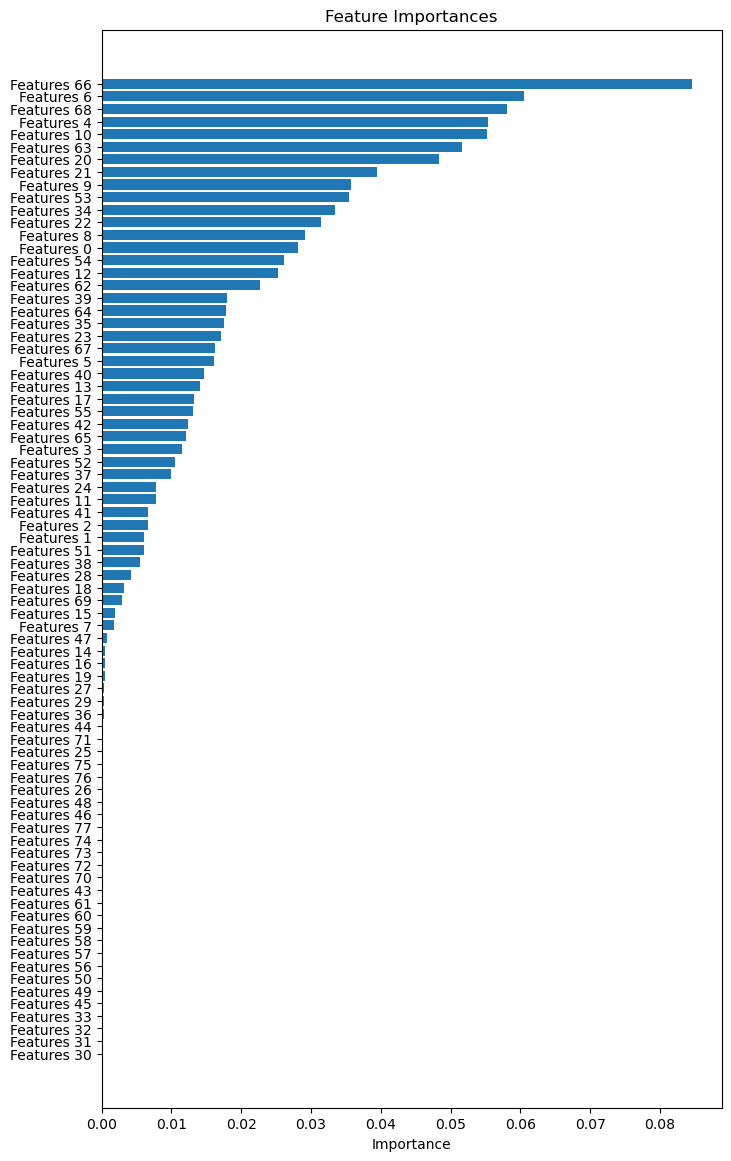

In [80]:
importances = rf_model.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_names = [f"Features {i}" for i in indices]
plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

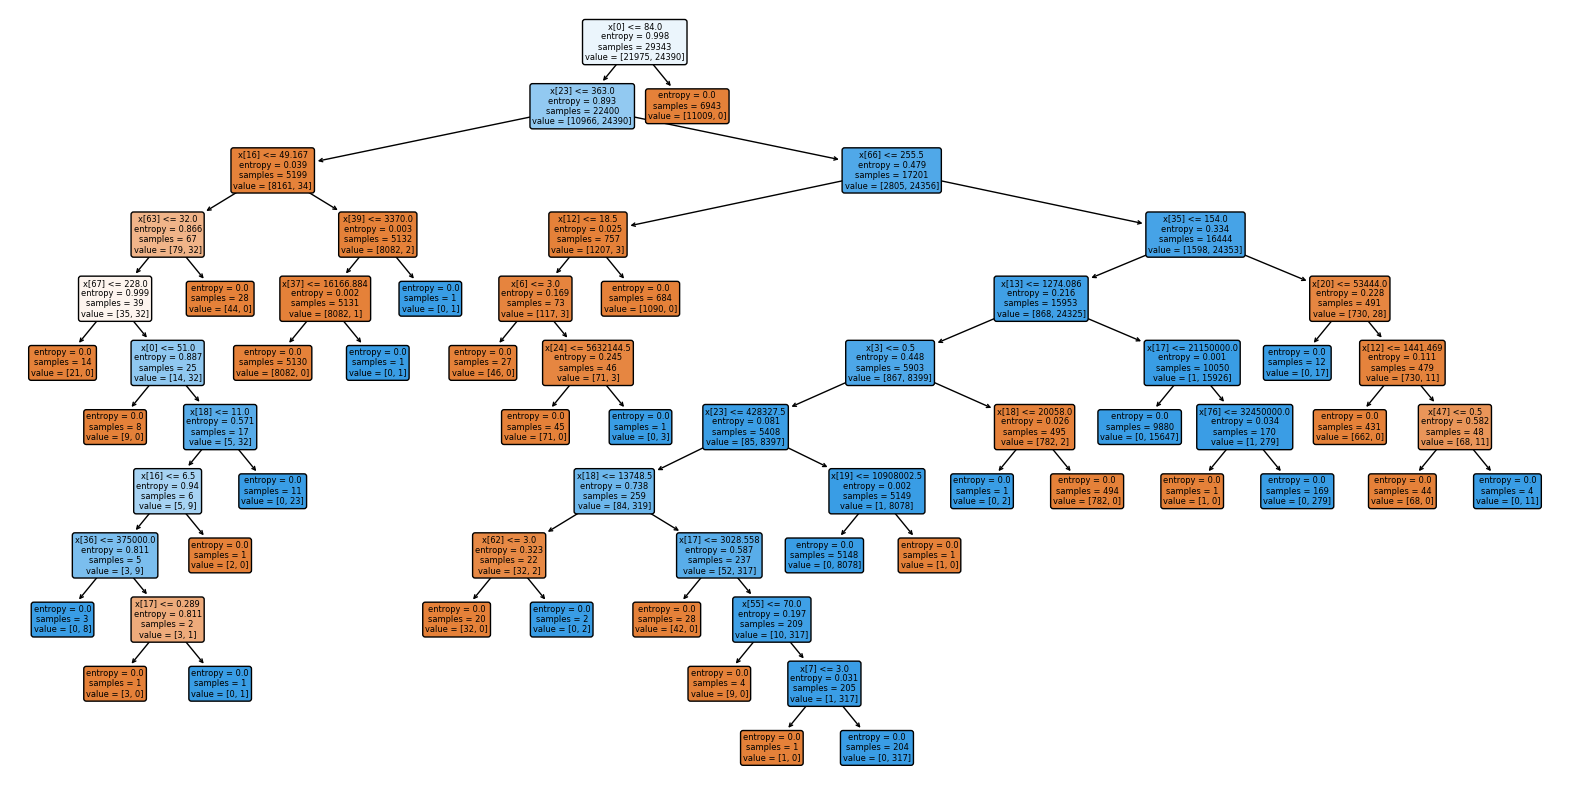

In [81]:
from sklearn.tree import plot_tree
estimator = rf_model.estimators_[0]  
plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

In [82]:
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [83]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [84]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Random Forest Metrics:
Accuracy: 0.9994
F1 Score: 0.9995
Precision: 1.0000
Recall: 0.9989


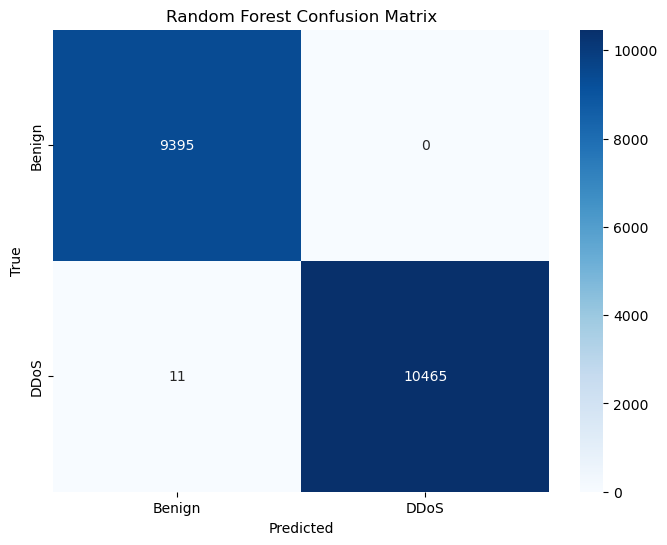

In [85]:
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

In [19]:
lr_model = LogisticRegression(solver = "liblinear", max_iter = 1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [20]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [21]:
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')


Logistic Regression Metrics:
Accuracy: 0.9634
F1 Score: 0.9662
Precision: 0.9416
Recall: 0.9921


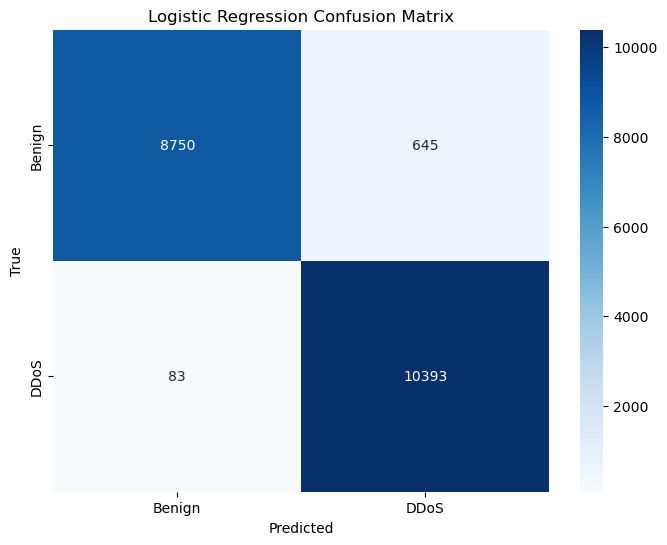

In [22]:
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Logistic Regression Confusion Matrix')

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [25]:
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)

In [26]:
print('\nDecision Tree Metrics:')
print(f'Accuracy: {dt_accuracy:.4f}')
print(f'F1 Score: {dt_f1:.4f}')
print(f'Precision: {dt_precision:.4f}')
print(f'Recall: {dt_recall:.4f}')


Decision Tree Metrics:
Accuracy: 0.9994
F1 Score: 0.9995
Precision: 0.9999
Recall: 0.9990


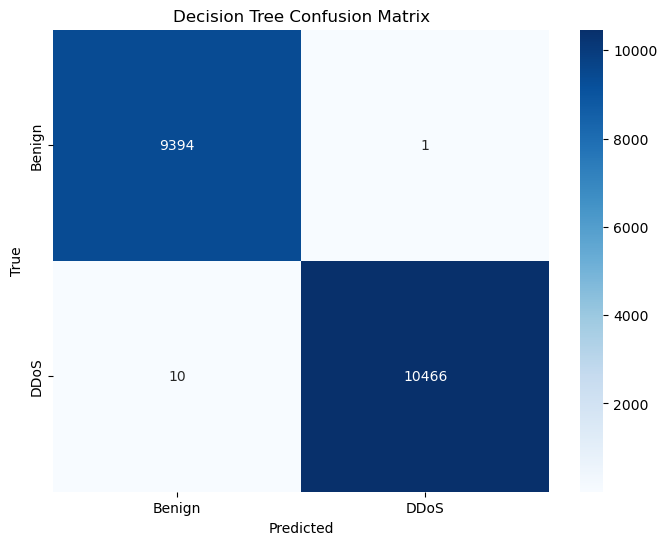

In [27]:
plot_confusion_matrix(y_test, dt_pred, ['Benign', 'DDoS'], 'Decision Tree Confusion Matrix')

In [28]:
rf_proba = rf_model.predict_proba(X_test)
lr_proba = lr_model.predict_proba(X_test)
dt_proba = dt_model.predict_proba(X_test)

In [29]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)
dt_fpr, dt_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
dt_auc = auc(dt_fpr, dt_tpr)

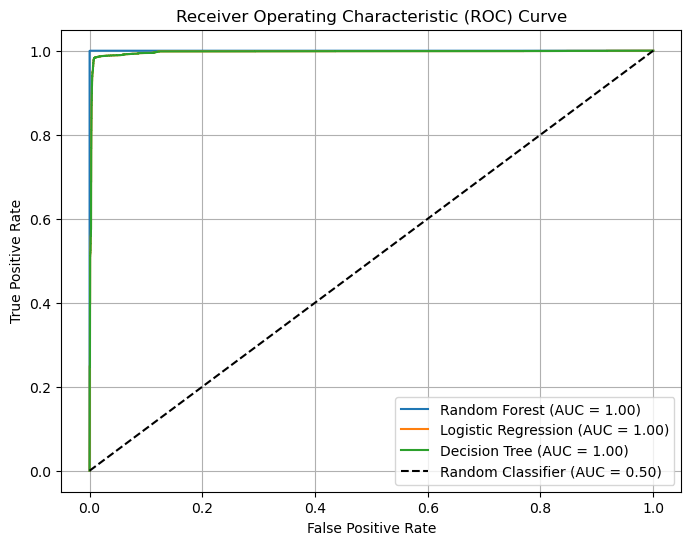

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

In [31]:
import pickle
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [32]:
import json
features_dict = data_f.to_dict(orient="records")
json_features = json.dumps(features_dict)
with open('features.json', 'w') as f:
    json.dump(features_dict, f)